In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test,Y_test)= keras.datasets.mnist.load_data()

In [3]:
len(X_test)

10000

In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

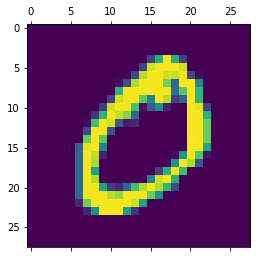

In [8]:
plt.matshow(X_train[1])

In [9]:
Y_train[1]

0

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
# Convert two demensional data into 1 demesional
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)


In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened.shape

(10000, 784)

In [15]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train_flattened,Y_train,epochs=5)
# Epochs is no of iteration for training

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4883 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2853 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2749 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9265


In [17]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9262


[0.26752638816833496, 0.9261999726295471]

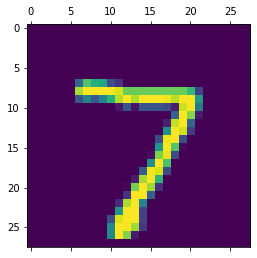

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted=model.predict(X_test_flattened)

In [20]:
max_values=y_predicted[0]

In [21]:
np.argmax(max_values)

7

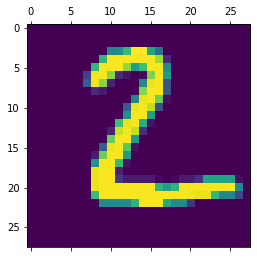

In [22]:
plt.matshow(X_test[1])

In [23]:
max_values=y_predicted[1]

In [24]:
np.argmax(max_values)

2

In [25]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
y_predicted_label=[np.argmax(i) for i in y_predicted ]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [27]:
cn=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_label)
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    1,    0,    6,    6,    3,    4,    0],
       [   0, 1114,    4,    1,    0,    1,    4,    2,    9,    0],
       [   3,   10,  933,    9,    7,    5,   13,   10,   39,    3],
       [   4,    1,   23,  884,    0,   40,    2,   14,   36,    6],
       [   1,    1,    4,    1,  905,    0,   12,    4,   11,   43],
       [   7,    3,    3,   17,    6,  792,   12,    5,   40,    7],
       [   7,    3,    6,    0,    7,   14,  914,    2,    5,    0],
       [   1,    6,   25,    2,    6,    0,    0,  952,    2,   34],
       [   4,    8,    7,   12,    9,   20,    8,   11,  889,    6],
       [   9,    7,    1,    6,   18,    5,    0,   28,   15,  920]])>

Text(69.0, 0.5, 'Truth')

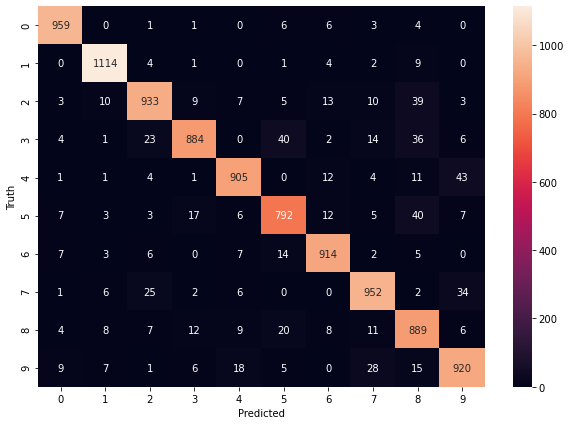

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Add Hidden Layer 

In [29]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train_flattened,Y_train,epochs=5)
# Epochs is no of iteration for training

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2900 - accuracy: 0.9196
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1359 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0968 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0761 - accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0613 - accuracy: 0.9814


In [30]:
model.evaluate(X_test_flattened,Y_test)
y_predicted_label=[np.argmax(i) for i in y_predicted ]

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9761


In [31]:
y_predicted=model.predict(X_test_flattened)

In [32]:
cn=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_label)

Text(69.0, 0.5, 'Truth')

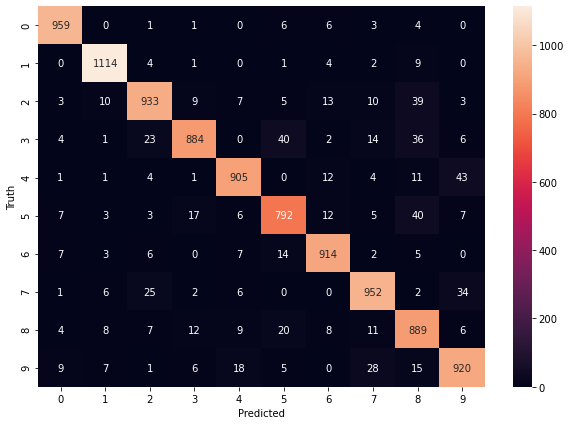

In [33]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")


# Without convert 2 D array into 1 D array 

In [34]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                       ])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(X_train,Y_train,epochs=5)
# Epochs is no of iteration for training

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2959 - accuracy: 0.9160
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0993 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9770
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9814
